<a href="https://colab.research.google.com/github/Inyrkz/breast_cancer/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pandas-profiling
!pip install -U pandas-profiling

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
dataset = pd.read_csv('breast_cancer_data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Exploratory Data Analysis

In [ ]:
# check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Exploratory data analysis with pandas profiling
import pandas_profiling

profile = dataset.profile_report(title='Breast Cancer Profiling Report')
profile

# import pandas_profiling as pp
# pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file='Breast_Cancer_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

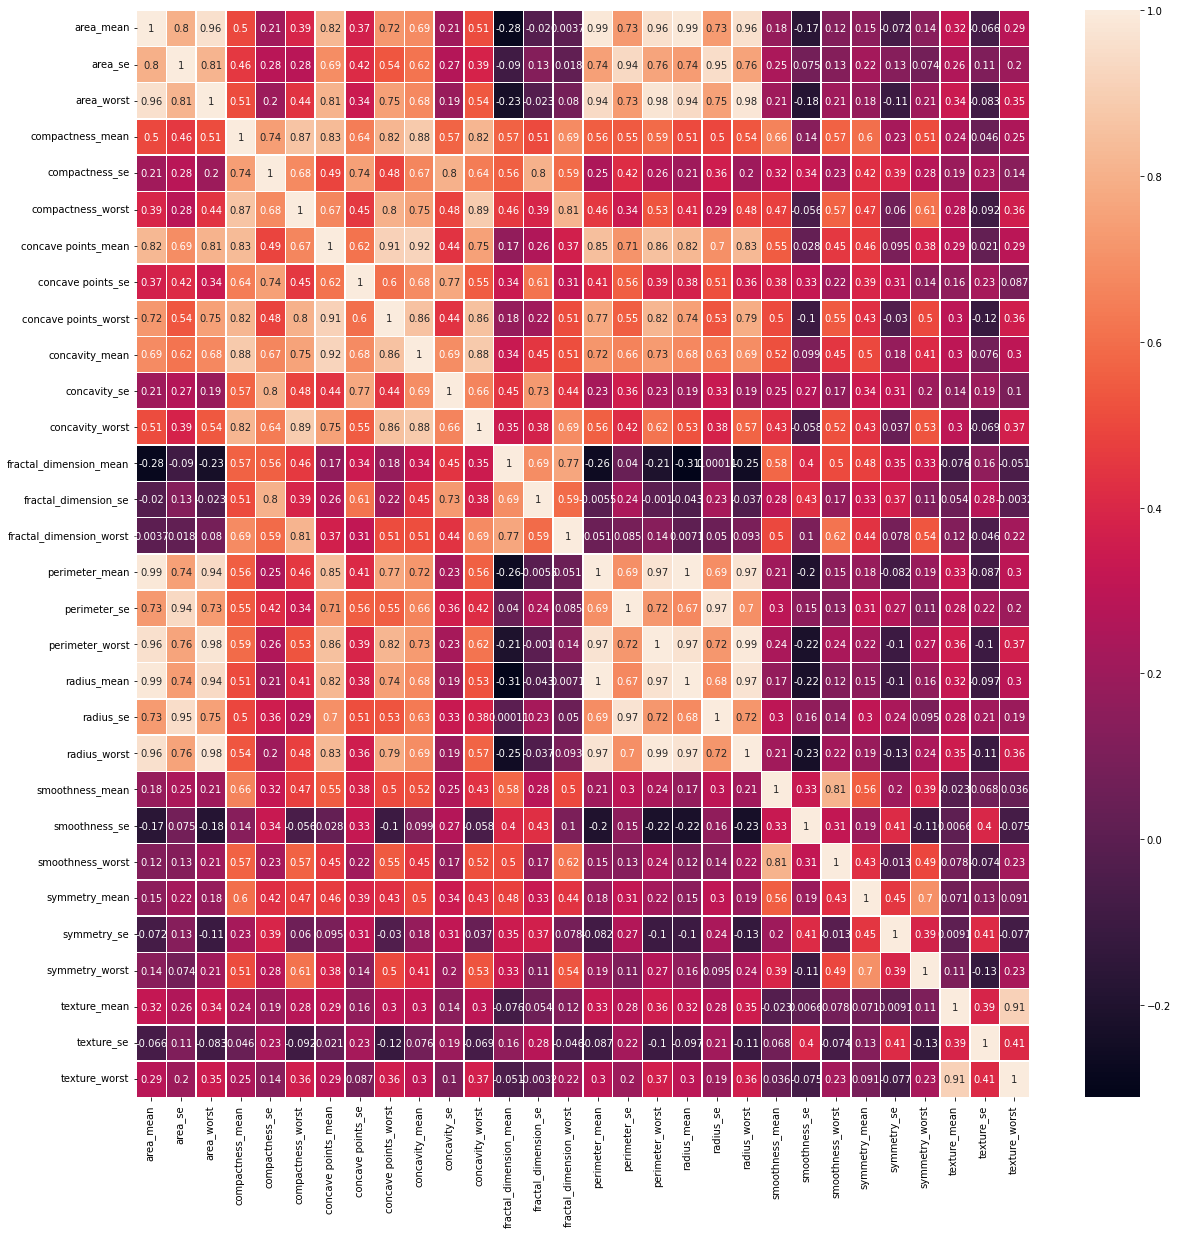

In [ ]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(20,20))  # Sample figsize in inches
sns.heatmap(dataset[dataset.columns.difference(['id', 'diagnosis', 'Unnamed: 32'])].corr(method='pearson'),
            annot=True, linewidths=.5, ax=ax)

#### Plot Labels Count in Pie Chart

Index(['B', 'M'], dtype='object')
B    357
M    212
Name: diagnosis, dtype: int64


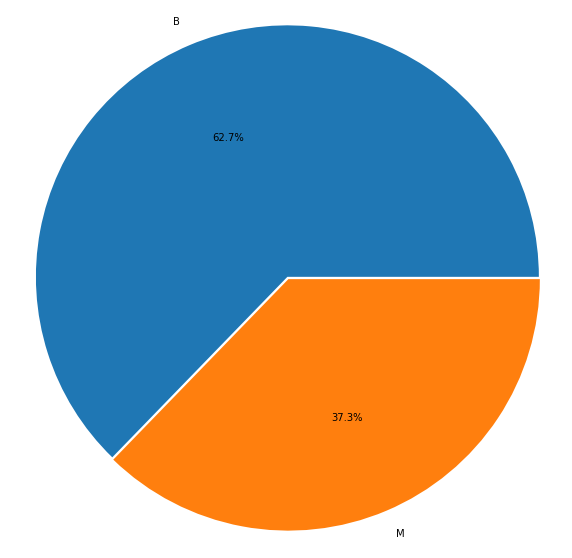

In [ ]:
# Check the number of unique values in the label column
label_count = dataset['diagnosis'].value_counts()
print(label_count.index)
print(label_count)

# Draw a pie chart with the values above
plt.figure(figsize=(10, 10))
plt.pie(label_count, labels=label_count.index,
        explode = [0, 0.01],
        autopct='%1.1f%%')
# plt.title('Crops Count in Dataset')
plt.axis('equal')
plt.show()

In [ ]:
# Features Extraction
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, 1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
--------------------------------------------------
Target Variable
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'B': 0, 'M': 1}


In [ ]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2,
                                                  random_state=42,
                                                  stratify=encoded_y)

print("Matrix of features (Training set)", X_train, sep='\n')
print("--------------------------------------------------")
print("Target Variable (Training set)", y_train, sep='\n')
print("--------------------------------------------------")
print("Matrix of features (Test set)", X_test, sep='\n')
print("--------------------------------------------------")
print("Target Variable (Test set)", y_test, sep='\n')

Matrix of features (Training set)
[[1.602e+01 2.324e+01 1.027e+02 ... 9.975e-02 2.948e-01 8.452e-02]
 [1.232e+01 1.239e+01 7.885e+01 ... 9.391e-02 2.827e-01 6.771e-02]
 [1.285e+01 2.137e+01 8.263e+01 ... 5.601e-02 2.488e-01 8.151e-02]
 ...
 [1.300e+01 2.513e+01 8.261e+01 ... 5.921e-02 2.306e-01 6.291e-02]
 [1.420e+01 2.053e+01 9.241e+01 ... 1.339e-01 2.534e-01 7.858e-02]
 [1.706e+01 2.100e+01 1.118e+02 ... 1.827e-01 2.623e-01 7.599e-02]]
--------------------------------------------------
Target Variable (Training set)
[1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 1 1

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
print("Scaled Matrix of features (Training set)",scaled_X_train, sep='\n', end='\n\n')
print("Scaled Matrix of features (Testing set)", scaled_X_test, sep='\n', end='\n\n')
print("Number of records in the training set: ", len(scaled_X_train))
print("Number of records in the test set: ", len(scaled_X_test))

Scaled Matrix of features (Training set)
[[ 0.51855873  0.89182579  0.4246317  ... -0.23574392  0.05456632
   0.02183673]
 [-0.51636409 -1.63971029 -0.54134872 ... -0.32320788 -0.13757624
  -0.90440164]
 [-0.36811839  0.45551496 -0.38824993 ... -0.89082504 -0.675893
  -0.14401559]
 ...
 [-0.32616206  1.33280304 -0.38905998 ... -0.84289958 -0.96490082
  -1.16888375]
 [ 0.00948859  0.25952507  0.00786279 ...  0.27571059 -0.60284707
  -0.30545988]
 [ 0.80945595  0.36918608  0.79320285 ...  1.00657384 -0.46151907
  -0.44817001]]

Scaled Matrix of features (Testing set)
[[-0.77089916 -2.00602473 -0.76451652 ... -0.38805702  0.16254727
   0.06095804]
 [ 1.89472636  0.96648861  1.89081582 ...  1.42292627  0.33722232
  -0.31041892]
 [ 0.56051506 -0.78108791  0.57044007 ...  0.14391558  0.38009711
   0.30174696]
 ...
 [ 0.10179251 -0.01812727  0.08238707 ... -0.29280517 -0.70288824
  -0.52310661]
 [ 0.26682074 -0.63876192  0.26586259 ...  0.14541325  0.79614133
   0.73153038]
 [ 0.53254417  0.0

### 5-Fold Cross Validation for Training  Set and Validation Set


In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
  '''Function to perform 5 Folds Cross-Validation
  
  model: machine learning algorithm is add as argument,
  _X: the matrix of features,
  _y: the target variable,
  _cv: number of folds for cross-validation. Default is 5.

  Output:
  Function returns a dictionary containing the metrics ('accuracy', 'precision', 'recall', 'f1')
  for both training set [if the return_train_score=True] and validation set.
  '''

  scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model,
                         X=_X,
                         y=_y,
                         cv=_cv,
                         scoring=scoring,
                         return_train_score=True)
  
  return {"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          }


# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    ''' 
      Function to plot a grouped bar chart showing the training and validation
      results of the ML model in each fold after applying K-fold cross validation.

      x_label: str, name of the algorithm used as x_label e.g 
      y_label: str, y_label e.g Accuracy
      plot_title: str, plot title e.g Accuracy Plot
      train_data: list, list containing either training precision, accuracy, f1 score
      val_data: list, list containing either validation precision, accuracy, f1 score
    '''
    # Accuracies Plot
    plt.figure(figsize=(12,6))
    # colour = ['green', 'blue', 'orange', 'violet', 'brown']

    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    
    X_axis = np.arange(len(labels))

    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()



### Confusion Matrix for Final Evaluation on the Test Set

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ax.grid(False)
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='',
                                                        xticks_rotation ='vertical')

# class labels
label = ['B', 'M']

# Training with Logistic Regression

In [ ]:
# Using GridSearchCV to find the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression_model_2 = LogisticRegression(max_iter=2000)


# setting different parameter combinations
parameters = [{'C': np.logspace(-5,8,15),
               'penalty': ['l1', 'l2']}]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=logistic_regression_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best f1 {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best accuracy 96.68 %
Best Parameters: {'C': 3.727593720314938, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

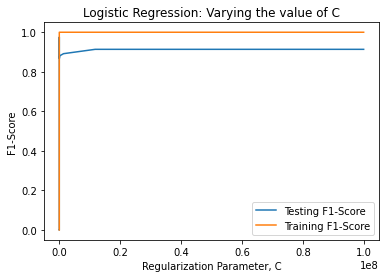

In [ ]:
# # Plot train and test accuracy for different values of the regularization (C) parameter
# # setup arrays to store training and test accuracy
# C_param = np.logspace(-5,8,15)
# lr_train_accuracy = np.empty(len(C_param))
# lr_test_accuracy = np.empty(len(C_param))

# # loop over different values of K
# for i,c in enumerate(C_param):
#   lr = LogisticRegression(C=c, penalty='l2', max_iter=1000)
#   lr.fit(scaled_X_train, y_train)
#   # compute accuracy on the training set
#   y_train_pred = lr.predict(scaled_X_train)
#   lr_train_accuracy[i] = f1_score(y_train, y_train_pred)
#   # compute accuracy on the test set
#   y_pred = lr.predict(scaled_X_test)
#   lr_test_accuracy[i] = f1_score(y_test, y_pred)

# # Generate plot
# plt.title('Logistic Regression: Varying the value of C')
# plt.plot(C_param, lr_test_accuracy, label='Testing F1-Score')
# plt.plot(C_param, lr_train_accuracy, label='Training F1-Score')
# plt.legend()
# plt.xlabel('Regularization Parameter, C')
# plt.ylabel('F1-Score')
# plt.show()

{'Training Accuracy scores': array([0.99175824, 0.98626374, 0.99725275, 0.98626374, 0.99175824]), 'Mean Training Accuracy': 99.06593406593407, 'Training Precision scores': array([1.       , 0.9924812, 1.       , 1.       , 1.       ]), 'Mean Training Precision': 0.9984962406015038, 'Training Recall scores': array([0.97794118, 0.97058824, 0.99264706, 0.96323529, 0.97794118]), 'Mean Training Recall': 0.9764705882352942, 'Training F1 scores': array([0.98884758, 0.98141264, 0.99630996, 0.98127341, 0.98884758]), 'Mean Training F1 Score': 0.9873382356061564, 'Validation Accuracy scores': array([0.97802198, 0.98901099, 0.95604396, 1.        , 0.95604396]), 'Mean Validation Accuracy': 97.58241758241759, 'Validation Precision scores': array([1.        , 0.97142857, 1.        , 1.        , 0.94117647]), 'Mean Validation Precision': 0.9825210084033614, 'Validation Recall scores': array([0.94117647, 1.        , 0.88235294, 1.        , 0.94117647]), 'Mean Validation Recall': 0.9529411764705882, 'Va

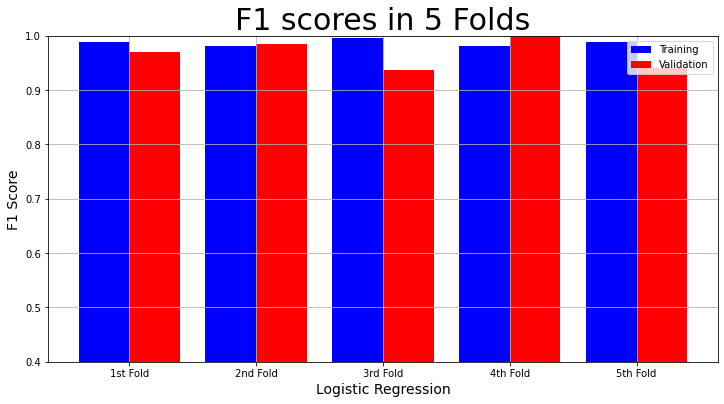

{'accuracy_score': 0.9736842105263158, 'precision_score': 0.9741062479117941, 'recall_score': 0.9692460317460317, 'f1_score': 0.9715828832571667}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



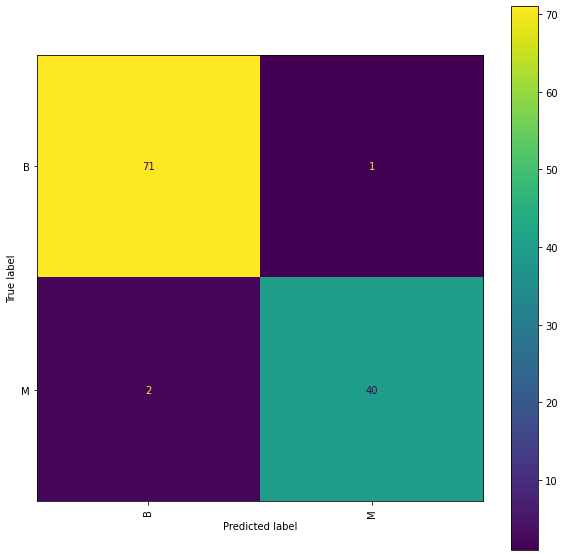

In [ ]:
# Use the best parameters to train the logistic regression algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=3.727593720314938, penalty='l2', max_iter=2000)
lr_train_val_result = cross_validation(lr_model, scaled_X_train, y_train, 5)
print(lr_train_val_result)

# Plot Training and Validation Result with F1-score as metric
model_name = "Logistic Regression"
plot_result(x_label=model_name,
            y_label="F1 Score",
            plot_title="F1 scores in 5 Folds",
            train_data=lr_train_val_result["Training F1 scores"],
            val_data=lr_train_val_result["Validation F1 scores"])


# Evaluate model on Test Set and plot results
lr_model.fit(scaled_X_train, y_train)
lr_y_pred = lr_model.predict(scaled_X_test)
# Get test result
lr_test_result = evaluate_model(y_test, lr_y_pred)
print(lr_test_result)
# Plot confusion matrix
plot_confusion_matrix(y_test, lr_y_pred, label)
print(classification_report(y_test, lr_y_pred))

# Training with KNN Algorithm

In [ ]:
# Use GridSearchCV to find the best parameters
from sklearn.neighbors import KNeighborsClassifier

knn_model_2 = KNeighborsClassifier()

# setting different parameter combinations
parameters = [{'n_neighbors':np.arange(1,15),
               'metric':['minkowski'],
               'p':np.arange(1,4)}
              ]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=knn_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best F1 score 95.71 %
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}


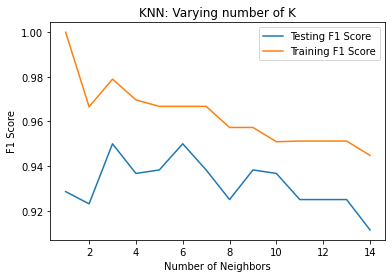

In [ ]:
# # setup arrays to store training and test accuracy
# neighbors = np.arange(1,15)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# # loop over different values of K
# for i,k in enumerate(neighbors):
#   knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
#   knn.fit(scaled_X_train, y_train)
#   # compute accuracy on the training set
#   y_train_pred = knn.predict(scaled_X_train)
#   train_accuracy[i] = f1_score(y_train, y_train_pred)
#   # compute accuracy on the test set
#   y_pred = knn.predict(scaled_X_test)
#   test_accuracy[i] = f1_score(y_test, y_pred)

# # Generate plot
# plt.title('KNN: Varying number of K')
# plt.plot(neighbors, test_accuracy, label='Testing F1 Score')
# plt.plot(neighbors, train_accuracy, label='Training F1 Score')
# plt.legend()
# plt.xlabel('Number of Neighbors')
# plt.ylabel('F1 Score')
# plt.show()

{'Training Accuracy scores': array([0.97252747, 0.96978022, 0.98076923, 0.96978022, 0.98351648]), 'Mean Training Accuracy': 97.52747252747251, 'Training Precision scores': array([0.9921875 , 0.98449612, 0.99236641, 0.99212598, 1.        ]), 'Mean Training Precision': 0.9922352040993434, 'Training Recall scores': array([0.93382353, 0.93382353, 0.95588235, 0.92647059, 0.95588235]), 'Mean Training Recall': 0.9411764705882353, 'Training F1 scores': array([0.96212121, 0.95849057, 0.97378277, 0.9581749 , 0.97744361]), 'Mean Training F1 Score': 0.9660026127320102, 'Validation Accuracy scores': array([0.96703297, 0.98901099, 0.95604396, 0.97802198, 0.95604396]), 'Mean Validation Accuracy': 96.92307692307693, 'Validation Precision scores': array([1.     , 1.     , 1.     , 1.     , 0.96875]), 'Mean Validation Precision': 0.99375, 'Validation Recall scores': array([0.91176471, 0.97058824, 0.88235294, 0.94117647, 0.91176471]), 'Mean Validation Recall': 0.9235294117647059, 'Validation F1 scores': 

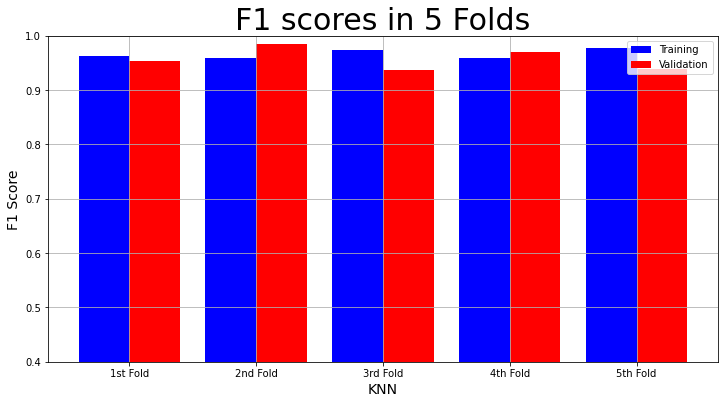

{'accuracy_score': 0.9736842105263158, 'precision_score': 0.9741062479117941, 'recall_score': 0.9692460317460317, 'f1_score': 0.9715828832571667}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



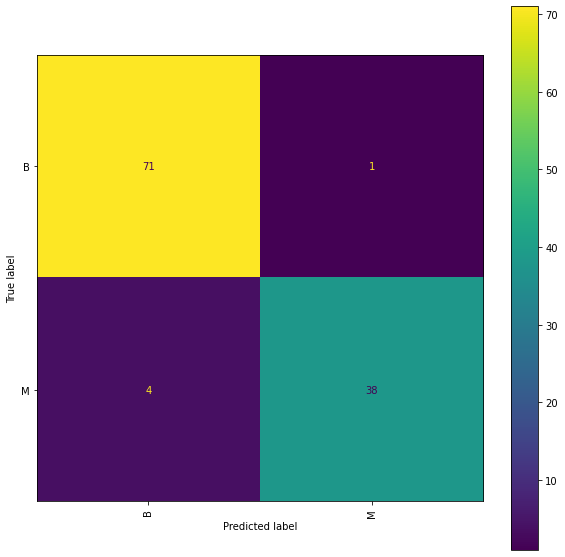

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn_train_val_result = cross_validation(knn_model, scaled_X_train, y_train, 5)
print(knn_train_val_result)

model_name = "KNN"
plot_result(x_label=model_name,
            y_label="F1 Score",
            plot_title="F1 scores in 5 Folds",
            train_data=knn_train_val_result["Training F1 scores"],
            val_data=knn_train_val_result["Validation F1 scores"])

# Evaluate model on Test Set and plot results
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_test)
# Get test result
knn_test_result = evaluate_model(y_test, knn_y_pred)
print(lr_test_result)
# Plot confusion matrix
plot_confusion_matrix(y_test, knn_y_pred, label)
print(classification_report(y_test, knn_y_pred))

# Training with SVM

In [ ]:
from sklearn.svm import SVC
svm_model_2 = SVC()


# setting different parameter combinations
parameters = [{'C':np.logspace(-5,8,15),
               'kernel':['linear', 'rbf', 'sigmoid', 'poly']}]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=svm_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best F1 score 96.70 %
Best Parameters: {'C': 3.727593720314938, 'kernel': 'rbf'}


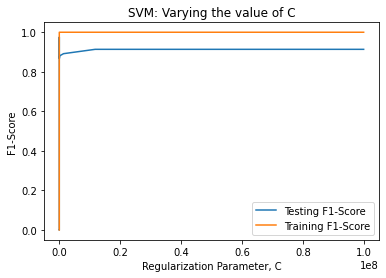

In [ ]:
# # Plot train and test accuracy for different values of the regularization (C) parameter
# # setup arrays to store training and test accuracy
# C_param = np.logspace(-5,8,15)
# train_accuracy = np.empty(len(C_param))
# test_accuracy = np.empty(len(C_param))

# # loop over different values of K
# for i,c in enumerate(C_param):
#   svm = SVC(C=c, kernel='rbf')
#   svm.fit(scaled_X_train, y_train)
#   # compute accuracy on the training set
#   y_train_pred = svm.predict(scaled_X_train)
#   train_accuracy[i] = f1_score(y_train, y_train_pred)
#   # compute accuracy on the test set
#   y_pred = svm.predict(scaled_X_test)
#   test_accuracy[i] = f1_score(y_test, y_pred)

# # Generate plot
# plt.title('SVM: Varying the value of C')
# plt.plot(C_param, lr_test_accuracy, label='Testing F1-Score')
# plt.plot(C_param, lr_train_accuracy, label='Training F1-Score')
# plt.legend()
# plt.xlabel('Regularization Parameter, C')
# plt.ylabel('F1-Score')
# plt.show()

{'Training Accuracy scores': array([0.98901099, 0.98626374, 0.99450549, 0.98351648, 0.99175824]), 'Mean Training Accuracy': 98.9010989010989, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([0.97058824, 0.96323529, 0.98529412, 0.95588235, 0.97794118]), 'Mean Training Recall': 0.9705882352941175, 'Training F1 scores': array([0.98507463, 0.98127341, 0.99259259, 0.97744361, 0.98884758]), 'Mean Training F1 Score': 0.9850463640727287, 'Validation Accuracy scores': array([0.96703297, 1.        , 0.96703297, 0.97802198, 0.96703297]), 'Mean Validation Accuracy': 97.58241758241759, 'Validation Precision scores': array([1.        , 1.        , 1.        , 0.97058824, 0.94285714]), 'Mean Validation Precision': 0.9826890756302522, 'Validation Recall scores': array([0.91176471, 1.        , 0.91176471, 0.97058824, 0.97058824]), 'Mean Validation Recall': 0.9529411764705882, 'Validation F1 scores': array([0.95384615, 1.        ,

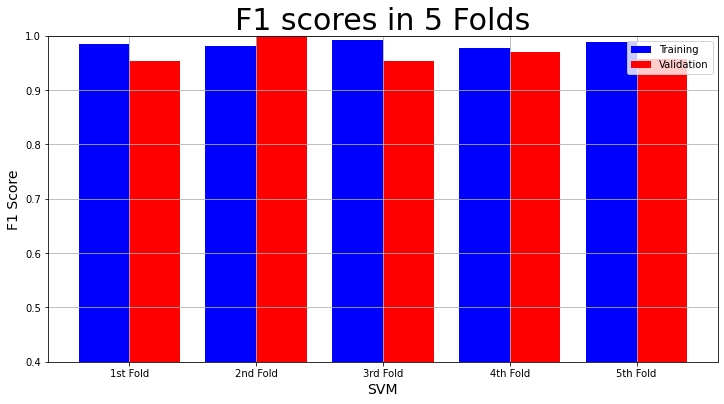

{'accuracy_score': 0.9736842105263158, 'precision_score': 0.98, 'recall_score': 0.9642857142857143, 'f1_score': 0.9712773998488284}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



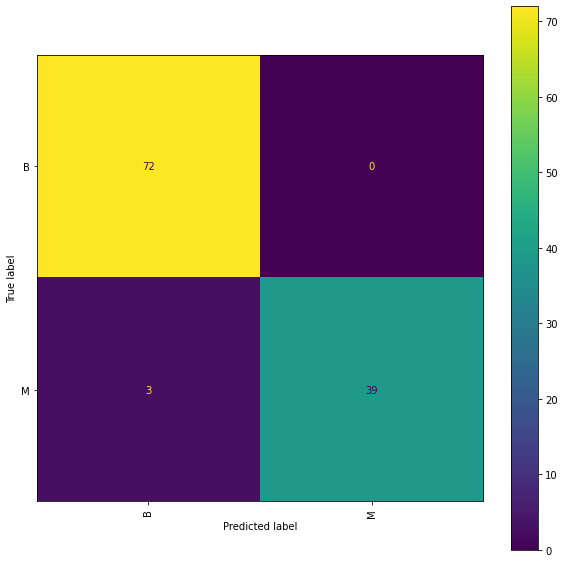

In [ ]:
# Use the best parameters to train the logistic regression algorithm
from sklearn.svm import SVC

svm_model = SVC(C=3.727593720314938, kernel='rbf')
svm_train_val_result = cross_validation(svm_model, scaled_X_train, y_train, 5)
print(svm_train_val_result)

# Plot Training and Validation Result with F1-score as metric
model_name = "SVM"
plot_result(x_label=model_name,
            y_label="F1 Score",
            plot_title="F1 scores in 5 Folds",
            train_data=svm_train_val_result["Training F1 scores"],
            val_data=svm_train_val_result["Validation F1 scores"])


# Evaluate model on Test Set and plot results
svm_model.fit(scaled_X_train, y_train)
svm_y_pred = svm_model.predict(scaled_X_test)
# Get test result
svm_test_result = evaluate_model(y_test, svm_y_pred)
print(svm_test_result)
# Plot confusion matrix
plot_confusion_matrix(y_test, svm_y_pred, label)
print(classification_report(y_test, svm_y_pred))

# Training with Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model_2 = DecisionTreeClassifier()

# setting different parameter combinations
parameters = [{'min_samples_split': np.arange(2, 70),
               'criterion':['gini', 'entropy']},
              ]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=decision_tree_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best F1 score 92.41 %
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 5}


{'Training Accuracy scores': array([0.99450549, 0.99725275, 0.99450549, 1.        , 0.98901099]), 'Mean Training Accuracy': 99.50549450549451, 'Training Precision scores': array([1.        , 0.99270073, 0.98550725, 1.        , 1.        ]), 'Mean Training Precision': 0.9956415952607639, 'Training Recall scores': array([0.98529412, 1.        , 1.        , 1.        , 0.97058824]), 'Mean Training Recall': 0.9911764705882353, 'Training F1 scores': array([0.99259259, 0.996337  , 0.99270073, 1.        , 0.98507463]), 'Mean Training F1 Score': 0.9933409891444536, 'Validation Accuracy scores': array([0.96703297, 0.94505495, 0.92307692, 0.96703297, 0.87912088]), 'Mean Validation Accuracy': 93.62637362637362, 'Validation Precision scores': array([0.96969697, 0.89189189, 0.88571429, 0.96969697, 0.81081081]), 'Mean Validation Precision': 0.9055621855621855, 'Validation Recall scores': array([0.94117647, 0.97058824, 0.91176471, 0.94117647, 0.88235294]), 'Mean Validation Recall': 0.9294117647058823

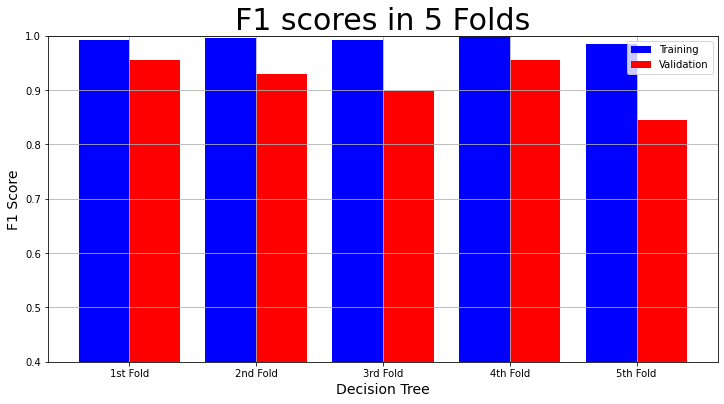

{'accuracy_score': 0.9473684210526315, 'precision_score': 0.9539473684210527, 'recall_score': 0.933531746031746, 'f1_score': 0.9422297297297297}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



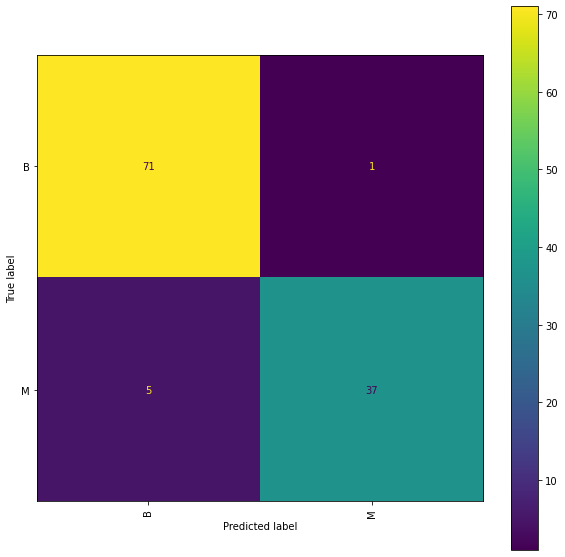

In [ ]:
# Use the best parameters to train the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy",
                                             min_samples_split=5,
                                             random_state=0)

dt_train_val_result = cross_validation(dt_model, scaled_X_train, y_train, 5)
print(dt_train_val_result)

# Plot Training and Validation Result with F1-score as metric
model_name = "Decision Tree"
plot_result(x_label=model_name,
            y_label="F1 Score",
            plot_title="F1 scores in 5 Folds",
            train_data=dt_train_val_result["Training F1 scores"],
            val_data=dt_train_val_result["Validation F1 scores"])


# Evaluate model on Test Set and plot results
dt_model.fit(scaled_X_train, y_train)
dt_y_pred = dt_model.predict(scaled_X_test)
# Get test result
dt_test_result = evaluate_model(y_test, dt_y_pred)
print(dt_test_result)
# Plot confusion matrix
plot_confusion_matrix(y_test, dt_y_pred, label)
print(classification_report(y_test, dt_y_pred))



# Training with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model_2 = RandomForestClassifier()

# setting different parameter combinations
parameters = [{'min_samples_split': np.arange(10,70, 5),
               'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(80,150, 10)}
              ]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=random_forest_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best F1 score 94.70 %
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 130}


{'Training Accuracy scores': array([0.98901099, 0.99175824, 0.99450549, 0.98351648, 0.98901099]), 'Mean Training Accuracy': 98.95604395604396, 'Training Precision scores': array([1.        , 1.        , 0.99264706, 0.98507463, 0.99253731]), 'Mean Training Precision': 0.9940517998244074, 'Training Recall scores': array([0.97058824, 0.97794118, 0.99264706, 0.97058824, 0.97794118]), 'Mean Training Recall': 0.9779411764705882, 'Training F1 scores': array([0.98507463, 0.98884758, 0.99264706, 0.97777778, 0.98518519]), 'Mean Training F1 Score': 0.9859064464590575, 'Validation Accuracy scores': array([0.96703297, 1.        , 0.92307692, 0.96703297, 0.91208791]), 'Mean Validation Accuracy': 95.3846153846154, 'Validation Precision scores': array([1.        , 1.        , 0.93548387, 0.96969697, 0.86111111]), 'Mean Validation Precision': 0.9532583903551647, 'Validation Recall scores': array([0.91176471, 1.        , 0.85294118, 0.94117647, 0.91176471]), 'Mean Validation Recall': 0.9235294117647059,

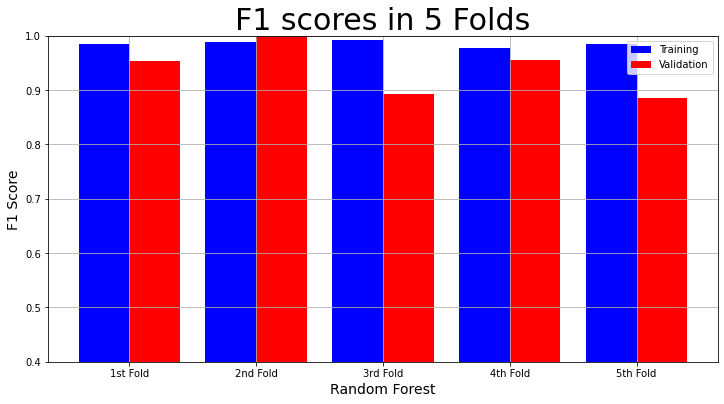

{'accuracy_score': 0.9649122807017544, 'precision_score': 0.9736842105263157, 'recall_score': 0.9523809523809523, 'f1_score': 0.9614864864864865}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



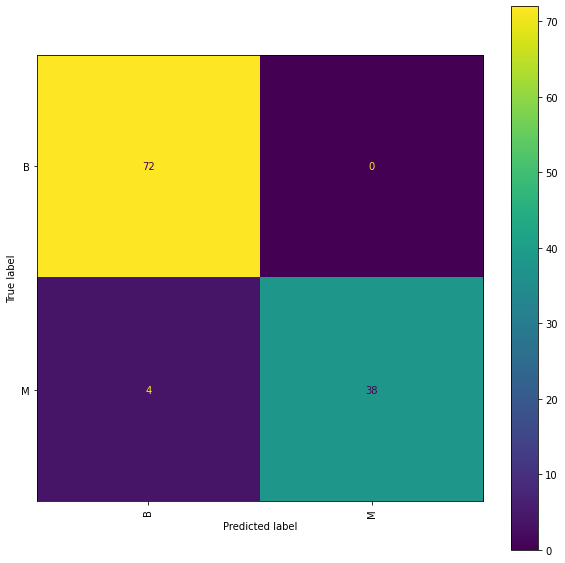

In [ ]:
# Use the best parameters to train the Random Forest algorithm
rf_model = RandomForestClassifier(n_estimators=130,
                                  min_samples_split=10,
                                  criterion="entropy",
                                  random_state=0)

rf_train_val_result = cross_validation(rf_model, scaled_X_train, y_train, 5)
print(rf_train_val_result)

# Plot Training and Validation Result with F1-score as metric
model_name = "Random Forest"
plot_result(x_label=model_name,
            y_label="F1 Score",
            plot_title="F1 scores in 5 Folds",
            train_data=rf_train_val_result["Training F1 scores"],
            val_data=rf_train_val_result["Validation F1 scores"])


# Evaluate model on Test Set and plot results
rf_model.fit(scaled_X_train, y_train)
rf_y_pred = rf_model.predict(scaled_X_test)
# Get test result
rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
# Plot confusion matrix
plot_confusion_matrix(y_test, rf_y_pred, label)
print(classification_report(y_test, rf_y_pred))

### Visualize Result

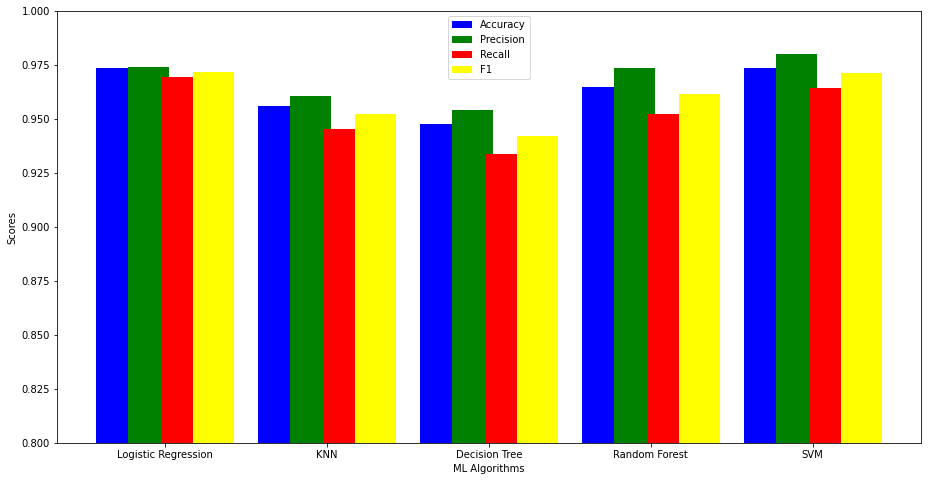

In [ ]:
# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm

accuracy_score_tf = [lr_test_result['accuracy_score'], knn_test_result['accuracy_score'],
                     dt_test_result['accuracy_score'], rf_test_result['accuracy_score'],
                     svm_test_result['accuracy_score']]

precision_score_tf = [lr_test_result['precision_score'], knn_test_result['precision_score'],
                     dt_test_result['precision_score'], rf_test_result['precision_score'],
                     svm_test_result['precision_score']]

recall_score_tf = [lr_test_result['recall_score'], knn_test_result['recall_score'],
                   dt_test_result['recall_score'], rf_test_result['recall_score'],
                   svm_test_result['recall_score']]

f1_score_tf = [lr_test_result['f1_score'], knn_test_result['f1_score'],
               dt_test_result['f1_score'], rf_test_result['f1_score'],
               svm_test_result['f1_score']]

models = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM"]

# 5 is the number of models used
X = np.arange(5)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_score_tf, color = 'b', width = 0.25)
ax.bar(X + 0.20, precision_score_tf, color = 'g', width = 0.25)
ax.bar(X + 0.40, recall_score_tf, color = 'r', width = 0.25)
ax.bar(X + 0.60, f1_score_tf, color = 'yellow', width = 0.25)
plt.xticks(X+0.30, models)
plt.ylim(0.8, 1)
plt.xlabel("ML Algorithms")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall", "F1"])